# Introduction 

This code was influenced by the blog below. Any code taken from there has been highlighted using comments.

https://towardsdatascience.com/math-neural-network-from-scratch-in-python-d6da9f29ce65

# Neural Network Classes 

Import libaries

In [249]:
#plan

#oop nn, ie has classes 

# get the predicted values stored somewhere

#import libraries 

import numpy as np
import random
import matplotlib.pyplot as plt
import time

Implement the abstract layer class

In [250]:
#### CODE FROM SOURCE - COMMENTS ARE MINE ####

# this is the abstract layer class - all layers in the network inherit from this class

class Layer:
  
  def __init__(layer):                          # constructor
    layer.input = None                          # property to store the number of input neurons to this layer
    layer.output = None                         # property to store the number of neurons in this layer

  def forward(layer, input):                    # function to perform forward propagation 
    raise NotImplementedError

  def backward(layer, outputGrad, learnRate):   # function to perform backward propagation 
    raise NotImplementedError

Implement Hidden layer


In [251]:
#### BASED ON SOURCE CODE - COMMENTS AND CHANGES ARE MINE ####

# the hidden layer class 
# this class randomises the weights and biases for the network, computes z (sum of weights and inputs plus the bias) 
# and will update the weights and biases for back propagation 

class Hidden(Layer):

  def __init__(layer, inputSize, outputSize):          # constructor with number of input neurons and number of output neurons 
    
    ## NEW
    layer.inputSize = inputSize
    layer.outputSize = outputSize

    ## MY CHANGES ##
    layer.weights = np.random.rand(layer.outputSize, layer.inputSize) - 0.5        # create a 2D array with random values between -0.5 and 0.5 for the initial weights for the layer 
    layer.bias = np.random.rand(layer.outputSize, 1) - 0.5                         # create a vector with random values between -0.5 and 0.5 for the initial biases for the layer


  def forward(layer, inputData):                                      # function forward propagation 
    
    layer.input = inputData                                           # store input data
    
    ## MY CHANGES ##
    layer.output = np.dot(layer.weights, layer.input) + layer.bias      # calculate z using the dot product of the matrix of weights and the vector of inputs 
    
    return layer.output                                                 # returns z as the ouput from the hidden layer 


  def backward(layer, outputGrad, learnRate):                           # function for backward propagation 
    
    ## MY CHANGES ##
    inputErrorDerv = np.dot(layer.weights.T, outputGrad)                # calculate the derivative of the error wrt the inputs 
    weightsErrorDerv = np.dot(outputGrad, layer.input.T)                # calculate the derivative of the error wrt the weights
    biasErrorDerv = outputGrad                                          # the derivative of the error wrt the bias is the same as the derivative of the error wrt to the output 

    ## FROM SOURCE ##
    layer.weights = layer.weights - learnRate * weightsErrorDerv        # update the weights 
    
    ## MY CHANGES ##
    layer.bias = layer.bias - learnRate * biasErrorDerv                 # update the bias
    
    return inputErrorDerv                                               # returns the derivative of the error wrt the inputs for the derivative of the activation function 
  

Implement activation layer

In [252]:
#### BASED ON SOURCE CODE - COMMENTS AND CHANGES ARE MINE ####

# this is the activation layer 
# this layer performs the activation function for foward propagation and the derivative of the activation function for back propagation 

class Activation(Layer):

  def __init__(layer, activationFn, activationFnDerv):            # constructor with activation function and it's derivative function 
    
    ## FROM SOURCE ##
    layer.activationFn = activationFn                             # the activation function provided for forward propagation 
    layer.activationFnDerv = activationFnDerv                     # the derivative of the activation function provided for backpropagation 


  def forward(layer, input):                                      # function for forward propagation 
    
    ## FROM SOURCE ##
    layer.input = input                                           # gets z from the previous hidden layer 
    layer.output = layer.activationFn(layer.input)                # passes z to the activation function
    return layer.output                                           # returns the output of the activation function for forward propagation 
  

  def backward(layer, outputGrad, learnRate):                     # function for backward propagation 
    
    ## MY CHANGES ##
    backDervFn = layer.activationFnDerv(layer.input) * outputGrad # calulates the derivative of the activation function

    return backDervFn                                             # returns the result of the derivative of the activation function 


Activation Functions

In [253]:
## MY CODE AND COMMENTS ##

# these are the activation functions and their respective derivative functions 

# the hyperbolic tangent activation function
def tanh(z):
  z = z.astype(float) 
  r = np.tanh(z)
  return r

# the derivative of the hyperbolic tangent activation function 
def tanhDerv(x):
  x = x.astype(float)
  r = 1 - np.tanh(x)**2
  return r

# the REctified Linear Unit activation function
def relu(z):
  for i in range(len(z[0])):
    z[0][i] = np.maximum(0,z[0][i])
  return z

# the derivative of the REctified Linear Unit activation function
def reluDerv(z):
  r = np.zeros([1,len(z[0])])
  for i in range(len(z[0])):
    if(z[0][i]<0):
      r[0][i] = 0
    else: 
      r[0][i] = 1
  return r

# the logistic/sigmoid activation function
def logistic(x):
  x=x.astype(float)
  r = 1/(1+np.exp(-x))
  return r

# the derivative of the logistic/sigmoid activation function
def logisticDerv(x):
  x=x.astype(float)
  r = logistic(x)*(1-logistic(x)) #(-np.exp(-x)/((1+np.exp(-x))**2))
  return r

Loss Functions

In [254]:
# Loss functions and their respective derivatives 

# mean squared value function  
def mse(yExpect, yPred):
  loss = np.mean(np.power(yExpect - yPred, 2))
  return loss

# derivatice of mean squared value function 
def mseDerv(yExpect, yPred):
  lossDerv = 2*(yPred - yExpect)/yExpect.size
  return lossDerv

# cross entropy function 
def crossEn(yExpect, yPred):
  if yPred < 0:
    yPred = 0
  errCE = -(yExpect*np.log(yPred)+(1-yExpect)*np.log(1-yPred))
  return errCE

# derivative of cross entropy function 
def crossEnDerv(yExpect, yPred):
  return -(yExpect/yPred)+((1-yExpect)/(1-yPred))

# absolute loss function 
def absLoss(yExpect, yPred):
  return abs(yExpect-yPred)

# derivative of absolute loss function 
def absLossDerv(yExpect, yPred):
  loss = np.zeros([len(yPred), 1])
  for i in range(len(yExpect)):
    if yPred[i] > yExpect[i]:
      loss[i] = 1
    elif yPred[i] < yExpect[i]:
      loss[i] = -1
    else :
      loss[i] = 0
  return loss


Nextwork class

In [255]:
#### FROM SOURCE - ALL COMMENTS AND CHANGES ARE MINE ####

# the network class is used to build, train and get predictions from the neural network

class Network:

    def __init__(self):                 # constructor takes no parameters 
        
        self.layers = []                # creates a list for the layers in the network
        self.loss = None                # the loss function for the network
        self.loss_prime = None          # the derivative of the loss function for the network 


    def add(self, layer):               # function used to add layers to the neural network

        self.layers.append(layer)       # add a layer to the network by adding it to the layer list


    def use(self, loss, loss_prime):    # assign a loss function and it's derivative to the network 
        self.loss = loss                # assigns the loss function 
        self.loss_prime = loss_prime    # assigns the derivative of the loss function 


    def predict(self, input_data):                  # predict the outputs from the trained neural network
       
        samples = len(input_data)                   # get the number of outputs to be predicted from the number of input rows in the dataset
        result = []                                 # initialise a list to store the predicted results from the network
        for i in range(samples):                    # for each row in the data (every output to be)
            output = input_data[i]                  # get the next row in the input data          
            for layer in self.layers:               # for each layer in the network
              output = layer.forward(output)        # perform a forward pass through the layers in the network
            result.append(output)                   # store the predicted result from the forward pass in the list
        return result                               # return the list of results 


    def fitSGD(self, x_train, y_train, epochs, learning_rate):    # train the neural network using stocastic gradient descent 
        
        samples = len(x_train)                                        # get the number of rows in the input data
        errorStore = np.zeros(epochs)                                 # initialise an array to store the error for each epoch 
        for i in range(epochs):                                       # for each epoch
            err = 0                                                   # set error sum to 0
            for j in range(samples):                                  # for each row in the input data
                
                #Performs a forward pass and backpropagation for every row in the input data
                
                output = x_train[j]                                   # store the inputs for the row
                for layer in self.layers:                             # for each layer in the network
                  output = layer.forward(output)                      # perform forward propagation 
                err += self.loss(y_train[j], output)                  # add the error for this forward pass calculated with the loss function to the error sum
                error = self.loss_prime(y_train[j], output)           # calclate the derivative of the loss function 
                for layer in reversed(self.layers):                   # for each layer in the network perform backpropagation 
                    error = layer.backward(error, learning_rate)      # updates the weights and biases
            err /= samples                                            # calculate the error for this epoch
            errorStore[i] = err                                       # store the error in the array
            ## MY CHANGES ##
            print('The error at epoch %d/%d is error=%f' % (i+1, epochs, err))      # print the error for the epoch
        return errorStore
    
    
    # see comments above for SGD
    def fitBatch(self, x_train, y_train, epochs, learning_rate):
        samples = len(x_train)
        errorStore = np.zeros(epochs)
        for i in range(epochs):
            err = 0
            for j in range(samples):
            
            # performs a forward pass for every row in the input data before a backpropagation 

                output = x_train[j]
                for layer in self.layers:                       
                  output = layer.forward(output)
                err += self.loss(y_train[j], output)
                error = self.loss_prime(y_train[j], output)
            for layer in reversed(self.layers):
                error = layer.backward(error, learning_rate)
            err /= samples
            errorStore[i] = err
            ## MY CHANGES ##
            print('The error at epoch %d/%d is error=%f' % (i+1, epochs, err))      # print the error for the epoch
        return errorStore

    # see comments above for SGD
    def fitMinBatch(self, x_train, y_train, epochs, learning_rate, batchSize):
        samples = len(x_train)
        errorStore = np.zeros(epochs)
        for i in range(epochs):
            err = 0

            # performs forward pass on random batch of input rows (size specified in the constructor) before performing a backpropagtion 

            ## MY CHANGES ##
            for j in range(batchSize):                                                 
                index = random.randint(0, len(x_train))-1
                output = x_train[index]
                for layer in self.layers:
                  output = layer.forward(output)
                err += self.loss(y_train[index], output)
                error = self.loss_prime(y_train[index], output)

            ## SOURCE ##
            for layer in reversed(self.layers):
                error = layer.backward(error, learning_rate)
            err /= samples
            errorStore[i] = err
            ## MY CHANGES ##
            print('The error at epoch %d/%d is error=%f' % (i+1, epochs, err))      # print the error for the epoch
        return errorStore
        

# Data manipulation 

In [256]:
# import libaries 

import sys
assert sys.version_info >= (3, 5)
import io

# upload the file - was written in google colab

from google.colab import files
uploaded = files.upload()     # upload the wdbc.data file provided in the coursework sheet

Saving wdbc.data to wdbc (7).data


In [257]:
data = pd.read_csv(io.BytesIO(uploaded['wdbc.data']))             # store the data in the file in a dataframe
print(data)                                                       # sanity check 
data.head()                                                       # sanity check

       842302  M  17.99  10.38   122.8    1001   0.1184   0.2776   0.3001  \
0      842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690   
1    84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740   
2    84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140   
3    84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800   
4      843786  M  12.45  15.70   82.57   477.1  0.12780  0.17000  0.15780   
..        ... ..    ...    ...     ...     ...      ...      ...      ...   
563    926424  M  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390   
564    926682  M  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400   
565    926954  M  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251   
566    927241  M  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140   
567     92751  B   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000   

      0.1471  ...   25.38  17.33   184.6    2019   0.1622   0.6656  0.7119 

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [258]:
# add titles to the columns based on website provided in cw sheet
data.columns = ["ID_Number","Diagnosis","Radius1","Texture1","Perimeter1","Area1","Smoothness1","Compactness1","Concavity1","Concave Points1","Symmetry1","Fractal Dimension1","Radius2","Texture2","Perimeter2","Area2","Smoothness2","Compactness2","Concavity2","Concave Points2","Symmetry2","Fractal Dimension2","Radius3","Texture3","Perimeter3","Area3","Smoothness3","Compactness3","Concavity3","Concave Points3","Symmetry3","Fractal Dimension3"]
data.head()   # check they have been added correctly

,ID_Number,Diagnosis,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,Concave Points1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,Concave Points3,Symmetry3,Fractal Dimension3
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [259]:
data.describe()     # sanity check

,ID_Number,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,Concave Points1,Symmetry1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,Concave Points3,Symmetry3,Fractal Dimension3
count,5.680000e+02,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,3.042382e+07,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,1.251246e+08,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692225e+05,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,9.061570e+05,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,8.825022e+06,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [260]:
data.info()     # check data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_Number           568 non-null    int64  
 1   Diagnosis           568 non-null    object 
 2   Radius1             568 non-null    float64
 3   Texture1            568 non-null    float64
 4   Perimeter1          568 non-null    float64
 5   Area1               568 non-null    float64
 6   Smoothness1         568 non-null    float64
 7   Compactness1        568 non-null    float64
 8   Concavity1          568 non-null    float64
 9   Concave Points1     568 non-null    float64
 10  Symmetry1           568 non-null    float64
 11  Fractal Dimension1  568 non-null    float64
 12  Radius2             568 non-null    float64
 13  Texture2            568 non-null    float64
 14  Perimeter2          568 non-null    float64
 15  Area2               568 non-null    float64
 16  Smoothne

In [261]:
data["Diagnosis"] = np.where(data["Diagnosis"] == "M", 1, 0)            # change the Ms to 1s and Bs to 0s 
Y = np.array(data[["Diagnosis"]])                                       # Y is the array of expected outcomes 
print(Y)                                                                # sanity check

#data["DiagnosisBinary"] = np.where(data["Diagnosis"] == 1, 0, 1)       # add another row opposite to Y for binary output neurons 
#YBinary = np.array(data[["DiagnosisBinary"]])

# X is the array of inputs for the NN
X = np.array(data[["Radius1","Texture1","Perimeter1","Area1","Smoothness1","Compactness1","Concavity1","Concave Points1","Symmetry1","Fractal Dimension1","Radius2","Texture2","Perimeter2","Area2","Smoothness2","Compactness2","Concavity2","Concave Points2","Symmetry2","Fractal Dimension2","Radius3","Texture3","Perimeter3","Area3","Smoothness3","Compactness3","Concavity3","Concave Points3","Symmetry3","Fractal Dimension3"]]) # X is the input data (does not include the outcome)
print(X)                                                                # sanity check

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]


In [262]:
# Normalise the inputs (X)

XNorm = (X - np.amin(X)) / (np.amax(X) - np.amin(X))          # perform min-max normalisation on the data to avoid skewing the NN
print(XNorm)  # Sanity check
X = XNorm

[[4.83544899e-03 4.17724495e-03 3.12411848e-02 ... 4.37235543e-05
  6.46450400e-05 2.09261871e-05]
 [4.62858486e-03 4.99529854e-03 3.05594734e-02 ... 5.71227080e-05
  8.49318289e-05 2.05876822e-05]
 [2.68453220e-03 4.79078514e-03 1.82369535e-02 ... 6.05312647e-05
  1.56041373e-04 4.06676070e-05]
 ...
 [3.90220969e-03 6.60084626e-03 2.54583921e-02 ... 3.33333333e-05
  5.21391631e-05 1.83826986e-05]
 [4.84250118e-03 6.89468735e-03 3.29337094e-02 ... 6.22943112e-05
  9.60742830e-05 2.91490362e-05]
 [1.82416549e-03 5.76868829e-03 1.12646921e-02 ... 0.00000000e+00
  6.74894217e-05 1.65467795e-05]]


In [263]:
def answerFn(out):                  # used to calculate the classification accuracy of the neural network
  p = np.zeros([len(x_train)])
  for i in range(len(x_train)):
    if out[i] < 0.5:
      p[i] = 0
    else:
      p[i] = 1
  return p

# Main

The error at epoch 1/1000 is error=1.761507
The error at epoch 2/1000 is error=1.748170
The error at epoch 3/1000 is error=1.733928
The error at epoch 4/1000 is error=1.718700
The error at epoch 5/1000 is error=1.702391
The error at epoch 6/1000 is error=1.684900
The error at epoch 7/1000 is error=1.666113
The error at epoch 8/1000 is error=1.645902
The error at epoch 9/1000 is error=1.624130
The error at epoch 10/1000 is error=1.600643
The error at epoch 11/1000 is error=1.575274
The error at epoch 12/1000 is error=1.547840
The error at epoch 13/1000 is error=1.518146
The error at epoch 14/1000 is error=1.485982
The error at epoch 15/1000 is error=1.451131
The error at epoch 16/1000 is error=1.413375
The error at epoch 17/1000 is error=1.372502
The error at epoch 18/1000 is error=1.328321
The error at epoch 19/1000 is error=1.280684
The error at epoch 20/1000 is error=1.229511
The error at epoch 21/1000 is error=1.174825
The error at epoch 22/1000 is error=1.116791
The error at epoch 

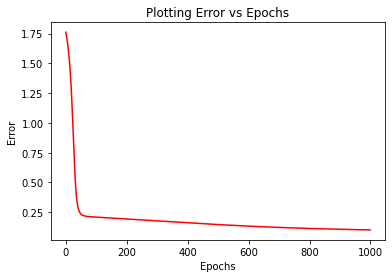

The classification accuracy is  87.67605633802818 %
Total time =  73.07847666740417
Train time =  72.9235508441925
Predict time =  0.014760255813598633


In [264]:
#### FROM SOURCE - COMMENTS AND CHANGES ARE MINE ####

# Main

## MY CHANGES ##
x_train = X.reshape(len(X), len(X[0]), 1)               # reshape the 2D array into a 3D array where each input row in the data set is one element in a vector of the size of the number of input rows 
y_train = Y.reshape(len(Y), 1)                          # reshape the expected ouputs 

startTimeTotal = time.time()                            # start time for building the network

## FROM SOURCE
net = Network()                                         # build, train and run the neural network

# add the layers with number of neurons and activation function (and derivative) to the network

## INSTUCTIONS 
## Must add both a Hidden and Activation class together
## The first hidden layer must have the number of input neurons equal to the number of coulmns in the input data
## Each following hidden layer must have number of input neurons  equal to the number of output neurons of the previos hidden layer
## The final hidden layer must have only 1 outout neuron 
## Each activation layer with activation function must have the corrisponding derivative activation function

## FROM SOURCE
net.add(Hidden(len(x_train[0]), 120))
net.add(Activation(tanh, tanhDerv))
net.add(Hidden(120, 5))
net.add(Activation(tanh, tanhDerv))
net.add(Hidden(5, 1))
net.add(Activation(tanh, tanhDerv))

## FROM SOURCE
net.use(mse, mseDerv)               #specify the loss function 

## MY CHANGES
startTimeTrain = time.time()        # time the training of the NN

# train the NN and specify the no. epochs, learning rate, gradient descent method 
# note min batch has an adjustable batch size 

epochs = 1000                       # number of epochs 

# gradient descent methods 
errorStore = net.fitSGD(x_train, y_train, epochs, learning_rate = 0.00001)
#errorStore = net.fitBatch(x_train, y_train, epochs, learning_rate = 0.00001)
#errorStore = net.fitMinBatch(x_train, y_train, epochs, learning_rate = 0.001, batchSize = 50)


endTimeTrain = time.time()                # time it takes to train NN
print("last error is ", errorStore[-1])   # print the last error from the training

# Plot the error vs the epochs 
xPlot = np.array(range(0, epochs))     
yPlot = errorStore
plt.title("Plotting Error vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.plot(xPlot, yPlot, color = "red")
#plt.legend()
plt.show()

startTimePredict = time.time()  #time the predictions 

## FROM SOURCE
out = net.predict(x_train)      # get the predictions from the NN

## MY CHANGES 
endTimePredict = time.time()    # time taken to predict

pred = answerFn(out)
expt = y_train.reshape(len(y_train)) * 1.0

# Accuracy calculation 

TP = 0  # True Positives
FP = 0  # False Positives
FN = 0  # False Negatives
TN = 0  # True Negatives

for i in range(len(pred)):
  if pred[i] == 1:
    if expt[i] == 1:
      TP += 1
    else:
      FP += 1
  elif pred[i] == 0:
    if expt[i] == 0:
      TN += 1
    else:
      FN += 1

accuracy = (TP + TN)/(TP+TN+FP+FN)      # calculate the classification accuracy 

print("The classification accuracy is ", accuracy*100, "%") # print classification accuracy 
endTimeTotal = time.time()

# print timing for NN
print("Total time = ", endTimeTotal - startTimeTotal)
print("Train time = ", endTimeTrain - startTimeTrain)
print("Predict time = ", endTimePredict - startTimePredict)
